<a href="https://colab.research.google.com/github/elyorbek8/ML_journey/blob/main/ml_project_steps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from IPython.display import display, HTML

display(HTML('''
<div style="text-align: center;">
  <img src="https://i.imgur.com/dzZnnYi.png" width="600">
</div>
'''))

# The processes of a Machine Learning project: CRISP-diagram

<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="600"/>


# 1-Understanding the problem.

The problem is about housing. The main goal of the model is to predict the average (mean) house prices by related factors.

# 2- learning the data set.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
link = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"

df = pd.read_csv(link)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# 2.2. Visual analysis.

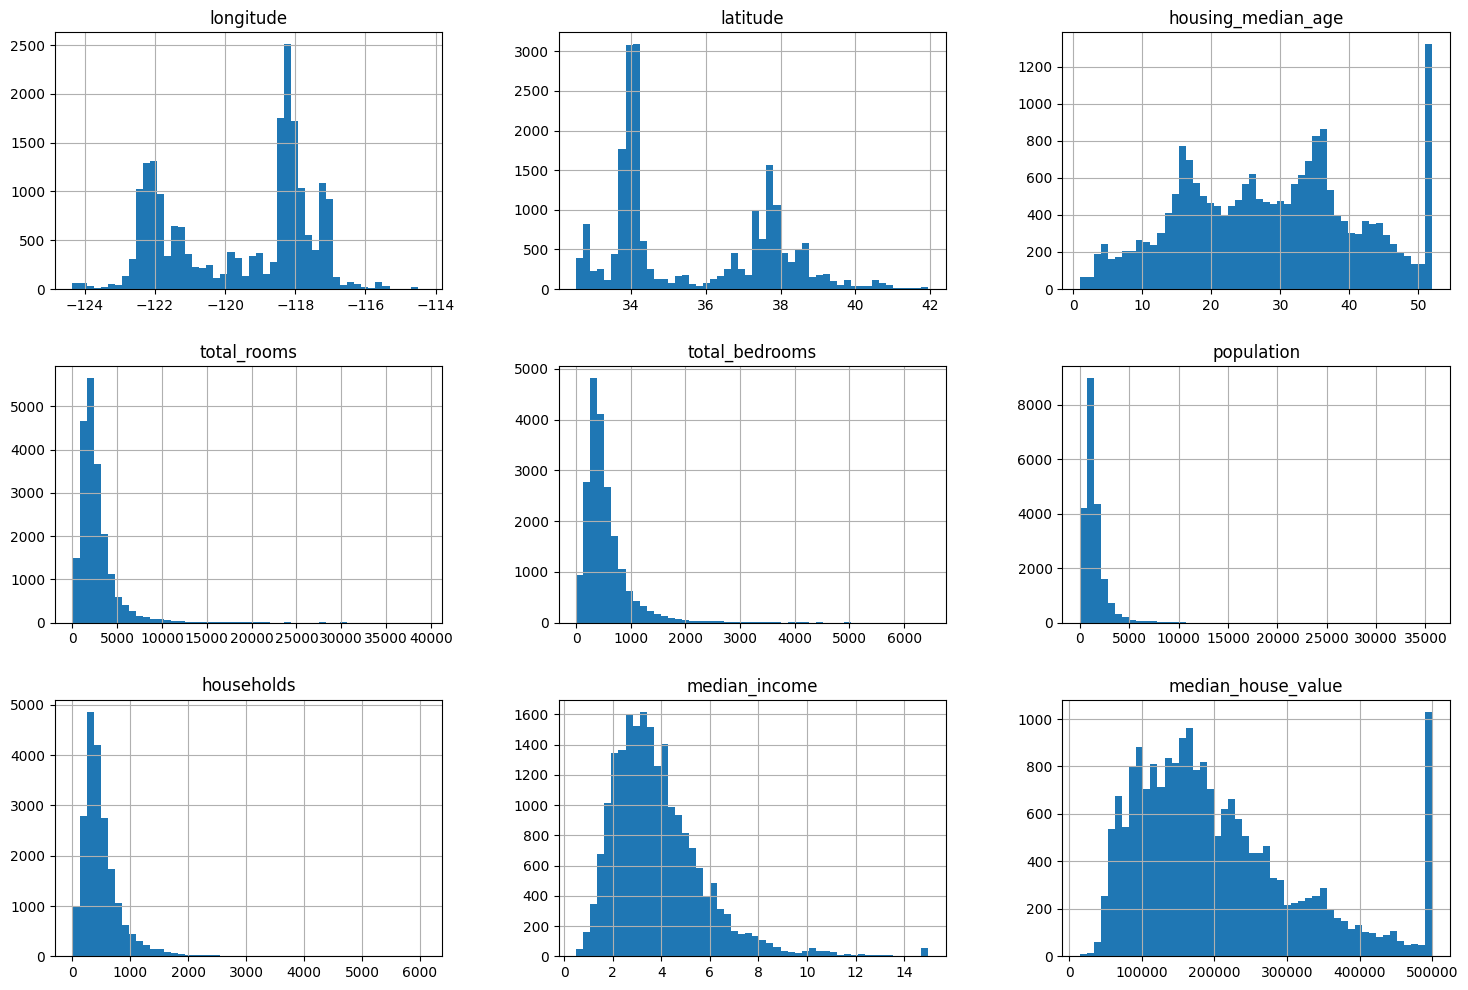

In [13]:
# %matplotlib inline
df.hist(bins= 50, figsize= (18, 12))
plt.show()

# 2.3. Spliting the data set to train and test sets
# ```train_set``` - 80%
# ```test_set``` - 20%

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 7865)

In [20]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10813,-117.93,33.64,15.0,1707.0,514.0,1335.0,434.0,2.7543,177800.0,<1H OCEAN
6173,-117.93,34.08,36.0,1371.0,246.0,806.0,241.0,4.5078,187100.0,<1H OCEAN
15807,-122.44,37.76,52.0,2110.0,454.0,816.0,438.0,3.9079,370000.0,NEAR BAY
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY


In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16312,-121.33,38.00,32.0,4474.0,929.0,2177.0,884.0,3.2889,98900.0,INLAND
16119,-122.46,37.78,52.0,2165.0,580.0,1067.0,530.0,2.9293,350000.0,NEAR BAY
15497,-117.24,33.11,10.0,3487.0,545.0,1410.0,557.0,6.0336,240300.0,NEAR OCEAN
19214,-122.70,38.45,26.0,2011.0,557.0,855.0,530.0,1.1250,233300.0,<1H OCEAN
5058,-118.35,34.01,33.0,3246.0,601.0,1585.0,603.0,3.6629,353200.0,<1H OCEAN


# Spliting the dataset in balance
Keeping a specific balance in train and test sets the same as the original dataset.

# Part 1

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


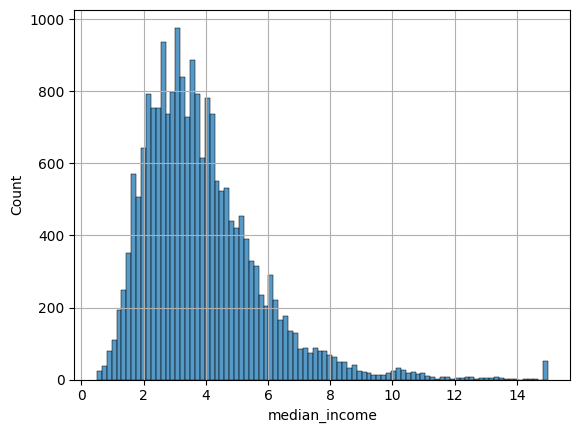

In [36]:
sns.histplot(df['median_income'])
plt.grid()
plt.show()

In [42]:
df['income_group'] = pd.cut(df['median_income'], bins= [0, 1.5, 2, 4, 5.5, 7, 9, np.inf], labels= [1, 2, 3, 4, 5, 6, 7])

In [43]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_group
1232,-120.36,38.21,10.0,4300.0,845.0,1480.0,609.0,2.8208,139900.0,INLAND,3
15235,-117.26,32.96,36.0,1721.0,264.0,710.0,282.0,10.1768,500001.0,NEAR OCEAN,7
18500,-121.55,37.37,39.0,759.0,141.0,252.0,106.0,3.6964,262500.0,INLAND,3
2415,-119.44,36.59,32.0,1153.0,236.0,761.0,241.0,2.8250,67600.0,INLAND,3
8634,-118.41,33.88,34.0,540.0,107.0,213.0,104.0,6.3403,500001.0,<1H OCEAN,5
5519,-118.39,33.97,43.0,2700.0,510.0,1146.0,506.0,5.1333,345900.0,<1H OCEAN,4
5458,-118.46,34.00,39.0,614.0,174.0,538.0,159.0,2.3542,235700.0,<1H OCEAN,3
16124,-122.47,37.78,52.0,2635.0,587.0,1302.0,577.0,3.7292,416700.0,NEAR BAY,3
1186,-121.55,39.45,18.0,2278.0,523.0,1185.0,475.0,1.3611,60600.0,INLAND,1
9185,-118.56,34.41,4.0,17313.0,3224.0,6902.0,2707.0,5.6798,320900.0,<1H OCEAN,5


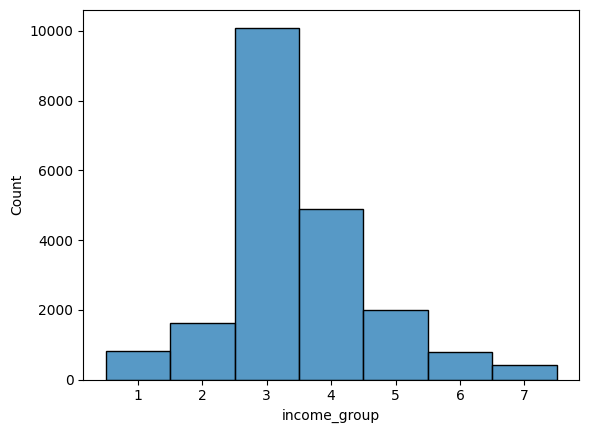

In [48]:
sns.histplot(df['income_group'])
plt.show()

# Part 2

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for strat_train_set, strat_test_set in stratified_split.split(df, df['income_group']):
  strat_train_set = df.loc[strat_train_set]
  strat_test_set = df.loc[strat_test_set]


In [53]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_group
8059,-118.20,33.85,33.0,2557.0,731.0,2286.0,700.0,2.3041,149100.0,<1H OCEAN,3
12850,-121.37,38.69,35.0,1093.0,192.0,590.0,190.0,2.7009,80200.0,INLAND,3
19571,-120.94,37.59,16.0,3964.0,824.0,2622.0,766.0,2.3152,111300.0,INLAND,3
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,500001.0,<1H OCEAN,7
8442,-118.36,33.90,42.0,1935.0,388.0,1136.0,379.0,4.7400,230000.0,<1H OCEAN,4


In [54]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_group
5920,-118.45,34.28,36.0,2602.0,638.0,2780.0,620.0,2.7155,149800.0,<1H OCEAN,3
1214,-120.67,37.97,9.0,7450.0,1475.0,2233.0,930.0,2.6528,133000.0,INLAND,3
13581,-117.28,34.12,36.0,2991.0,822.0,2378.0,751.0,1.3571,70600.0,INLAND,1
15596,-116.58,32.69,19.0,4085.0,876.0,2133.0,718.0,2.9190,116500.0,INLAND,3
1942,-120.93,38.65,12.0,2213.0,384.0,1097.0,351.0,4.5568,170100.0,INLAND,4


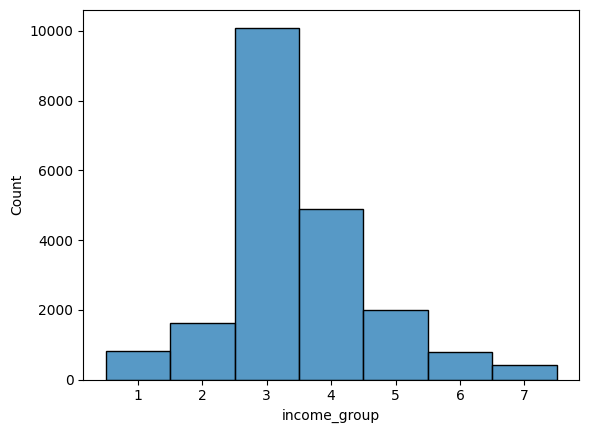

In [55]:
sns.histplot(df['income_group'])
plt.show()

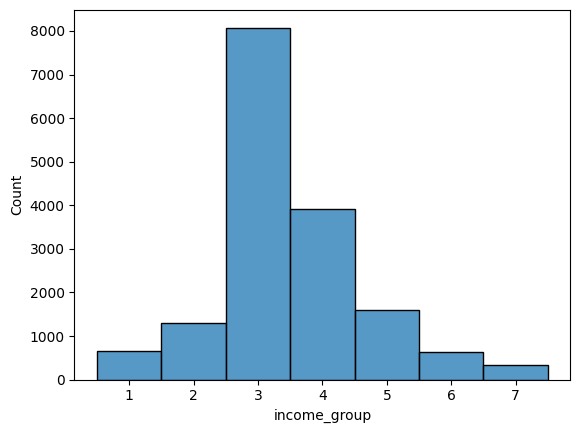

In [56]:
sns.histplot(strat_train_set['income_group'])
plt.show()

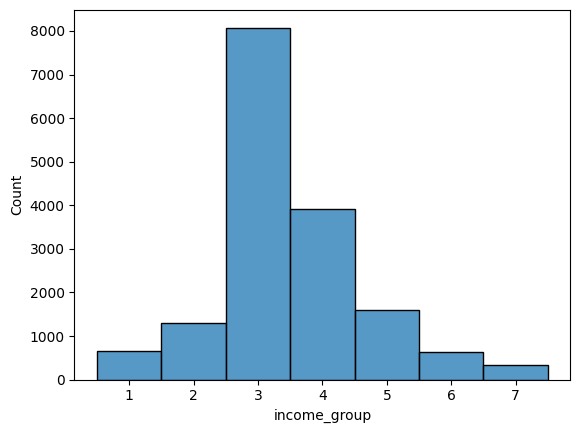

In [57]:
sns.histplot(strat_train_set['income_group'])
plt.show()

In [58]:
strat_train_set.drop('income_group', axis= 1, inplace= True)
strat_test_set.drop('income_group', axis= 1, inplace= True)

In [59]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8059,-118.20,33.85,33.0,2557.0,731.0,2286.0,700.0,2.3041,149100.0,<1H OCEAN
12850,-121.37,38.69,35.0,1093.0,192.0,590.0,190.0,2.7009,80200.0,INLAND
19571,-120.94,37.59,16.0,3964.0,824.0,2622.0,766.0,2.3152,111300.0,INLAND
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,500001.0,<1H OCEAN
8442,-118.36,33.90,42.0,1935.0,388.0,1136.0,379.0,4.7400,230000.0,<1H OCEAN


In [60]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5920,-118.45,34.28,36.0,2602.0,638.0,2780.0,620.0,2.7155,149800.0,<1H OCEAN
1214,-120.67,37.97,9.0,7450.0,1475.0,2233.0,930.0,2.6528,133000.0,INLAND
13581,-117.28,34.12,36.0,2991.0,822.0,2378.0,751.0,1.3571,70600.0,INLAND
15596,-116.58,32.69,19.0,4085.0,876.0,2133.0,718.0,2.9190,116500.0,INLAND
1942,-120.93,38.65,12.0,2213.0,384.0,1097.0,351.0,4.5568,170100.0,INLAND


# Finding correlations btween the predictable value with other columns


In [100]:
houses = strat_train_set.copy()
houses.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8059,-118.20,33.85,33.0,2557.0,731.0,2286.0,700.0,2.3041,149100.0,<1H OCEAN
12850,-121.37,38.69,35.0,1093.0,192.0,590.0,190.0,2.7009,80200.0,INLAND
19571,-120.94,37.59,16.0,3964.0,824.0,2622.0,766.0,2.3152,111300.0,INLAND
5351,-118.40,34.04,40.0,2079.0,268.0,720.0,282.0,9.2720,500001.0,<1H OCEAN
8442,-118.36,33.90,42.0,1935.0,388.0,1136.0,379.0,4.7400,230000.0,<1H OCEAN


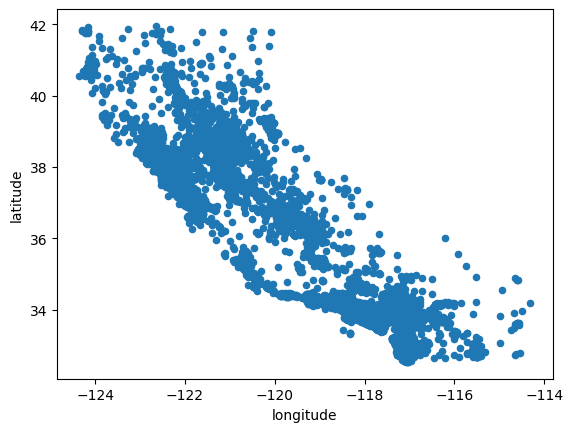

In [74]:
houses.plot(kind= 'scatter', x= 'longitude', y= 'latitude')
plt.show()

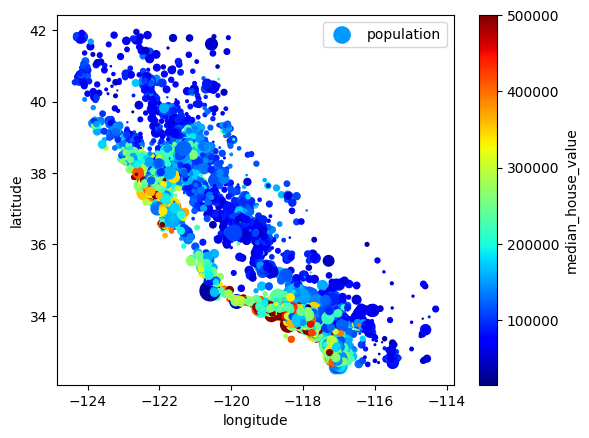

In [81]:
houses.plot(
    kind= 'scatter',
    x= 'longitude',
    y= 'latitude',
    s= houses['population'] / 60,
    c= 'median_house_value',
    cmap= 'jet',
    label= 'population',
    colorbar= True
)
plt.show()

In [85]:
houses.corrwith(houses['median_house_value'], numeric_only= True).sort_values(ascending= False)

,0
median_house_value,1.000000
median_income,0.686190
total_rooms,0.138059
housing_median_age,0.105840
households,0.069883
total_bedrooms,0.053008
population,-0.021574
longitude,-0.051323
latitude,-0.139278


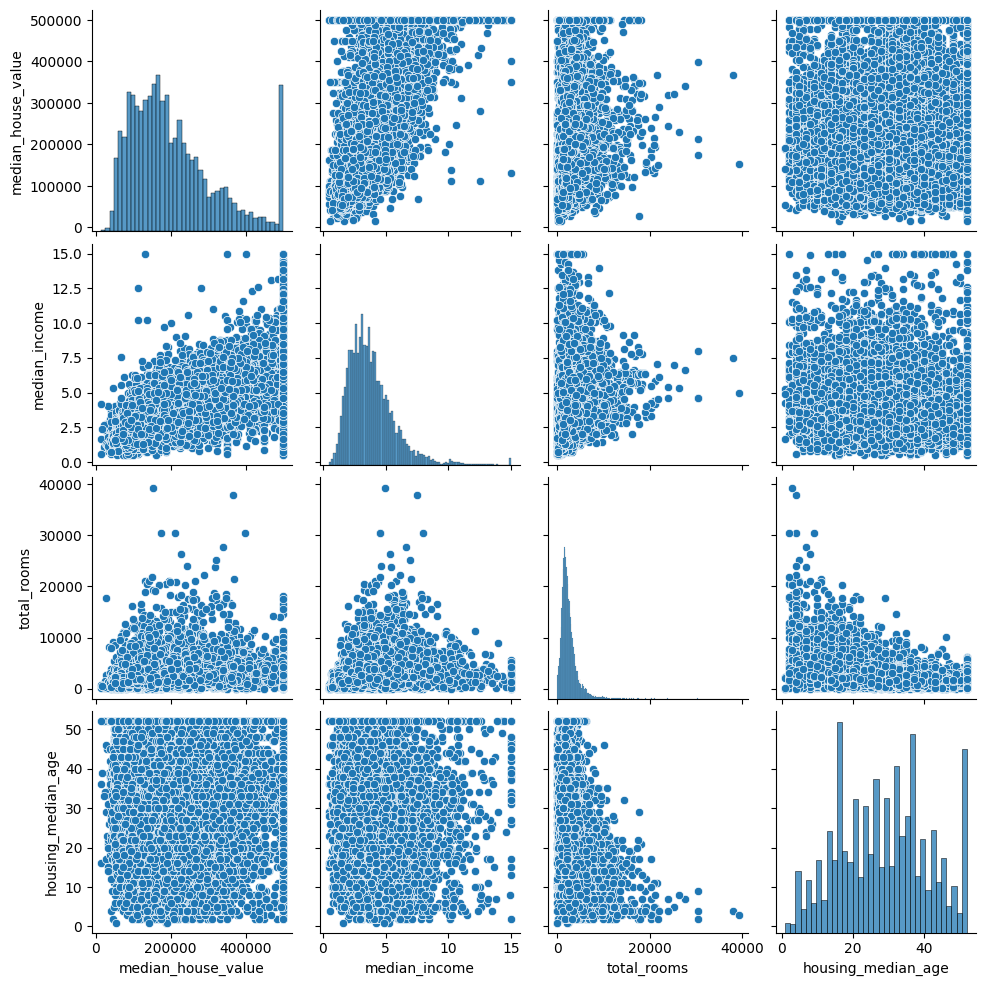

In [86]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

sns.pairplot(houses[cols])
plt.show()

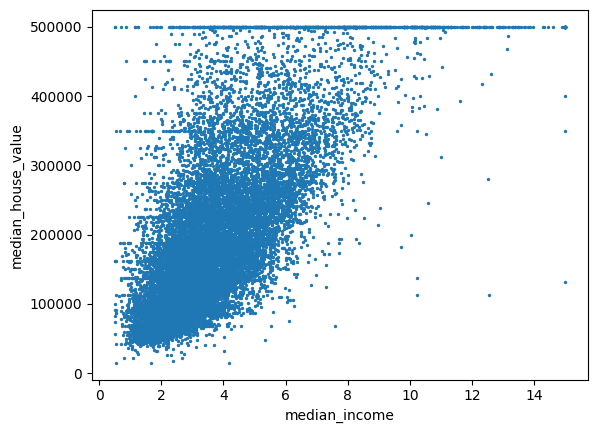

In [93]:
houses.plot(kind= 'scatter', x= 'median_income', y= 'median_house_value', s= 2)
plt.show()